<a href="https://colab.research.google.com/github/gaurav21s/deep-learning-basic/blob/main/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [29]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

In [30]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [31]:
from sklearn.model_selection import train_test_split
X_train_full, X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=21)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [33]:
np.random.seed(21)
tf.random.set_seed(21)

In [34]:
X_train.shape

(11610, 8)

In [53]:
model=keras.models.Sequential([
                               keras.layers.Dense(60,activation='relu',input_shape=X_train.shape[1:]),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(1)
])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 60)                540       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [56]:
mhistory=model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5467 - mae: 0.5146 - val_loss: 0.3662 - val_mae: 0.4281
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3913 - mae: 0.4429 - val_loss: 0.3760 - val_mae: 0.4598
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3871 - mae: 0.4344 - val_loss: 0.3195 - val_mae: 0.3915
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3488 - mae: 0.4144 - val_loss: 0.3309 - val_mae: 0.3866
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3481 - mae: 0.4142 - val_loss: 0.3110 - val_mae: 0.3796
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3558 - mae: 0.4141 - val_loss: 0.3059 - val_mae: 0.3791
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3320 - mae: 0.4064 - val_loss: 0.3039 - val_mae: 0.3929
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [60]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2824 - mae: 0.3638


In [58]:
#mhistory.history

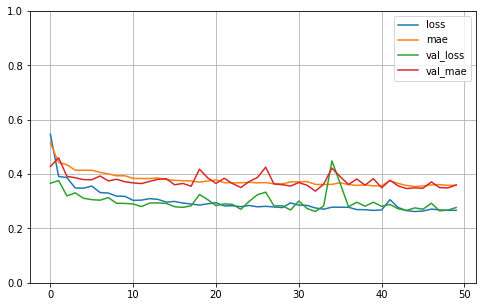

In [61]:
pd.DataFrame(mhistory.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [63]:
X_new=X_test[:3]

In [64]:
ypred=model.predict(X_new)

In [67]:
print(ypred)
print(y_test[:3])

[[0.9234779]
 [1.0784788]
 [1.551283 ]]
[0.988 1.572 1.609]
